In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']

df = pd.read_csv("./201304/CN-Reanalysis-daily-2013040100.csv").loc[:,['PM2.5(微克每立方米)','PM10(微克每立方米)','SO2(微克每立方米)','NO2(微克每立方米)','CO(毫克每立方米)','O3(微克每立方米)','U(m/s)','V(m/s)','TEMP(K)','RH(%)','PSFC(Pa)']]
#查看缺少值
df.isnull().sum()
#当how的值等于all的时候那么，只有当这行或者列都为nan的时候，那么这一整行或者列就要被删掉
df.dropna(axis=0,how='any')
#删除重复数据
df = df.drop_duplicates()
#查看数据信息
df.info()
'''数据没有缺失，所有的数据类型都符合接下来准备进行分析的要求'''

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42249 entries, 0 to 42248
Data columns (total 11 columns):
PM2.5(微克每立方米)    42249 non-null float64
PM10(微克每立方米)     42249 non-null float64
SO2(微克每立方米)      42249 non-null float64
NO2(微克每立方米)      42249 non-null float64
CO(毫克每立方米)       42249 non-null float64
O3(微克每立方米)       42249 non-null float64
U(m/s)           42249 non-null float64
V(m/s)           42249 non-null float64
TEMP(K)          42249 non-null float64
RH(%)            42249 non-null float64
PSFC(Pa)         42249 non-null float64
dtypes: float64(11)
memory usage: 3.9 MB


'数据没有缺失，所有的数据类型都符合接下来准备进行分析的要求'

In [53]:
#查看基本统计量
df.describe()

,PM2.5(微克每立方米),PM10(微克每立方米),SO2(微克每立方米),NO2(微克每立方米),CO(毫克每立方米),O3(微克每立方米),U(m/s),V(m/s),TEMP(K),RH(%),PSFC(Pa)
count,42249.000000,42249.000000,42249.000000,42249.000000,42249.000000,42249.000000,42249.000000,42249.000000,42249.000000,42249.000000,42249.000000
mean,31.365713,39.511843,8.685014,7.101671,0.369454,72.065384,0.236569,-0.174668,278.334411,56.148058,83341.196394
std,31.949993,43.718958,12.014059,11.003329,0.379136,16.055627,4.063291,3.216038,10.541005,23.842279,16017.250026
min,0.250000,0.340000,0.090000,0.070000,0.100000,10.820000,-11.750000,-12.970000,251.760000,10.480000,46679.980000
25%,5.010000,5.460000,0.800000,0.400000,0.150000,61.090000,-2.430000,-1.920000,268.360000,35.350000,69569.830000
50%,21.080000,25.320000,3.250000,1.940000,0.200000,70.500000,-0.270000,0.090000,278.780000,57.180000,88662.980000
75%,49.700000,60.730000,12.160000,9.020000,0.460000,82.800000,2.830000,1.860000,288.390000,77.900000,96574.700000
max,246.630000,397.390000,177.660000,93.030000,5.350000,139.600000,17.240000,15.770000,299.570000,100.000000,103348.390000


In [54]:
#计算相关系数
df.corr()

,PM2.5(微克每立方米),PM10(微克每立方米),SO2(微克每立方米),NO2(微克每立方米),CO(毫克每立方米),O3(微克每立方米),U(m/s),V(m/s),TEMP(K),RH(%),PSFC(Pa)
PM2.5(微克每立方米),1.000000,0.933905,0.689652,0.604925,0.665921,-0.434319,-0.340073,0.010886,0.582198,0.057056,0.525520
PM10(微克每立方米),0.933905,1.000000,0.784000,0.720493,0.781245,-0.436411,-0.247508,-0.044562,0.531656,0.046813,0.518361
SO2(微克每立方米),0.689652,0.784000,1.000000,0.795973,0.791559,-0.423811,-0.057873,-0.113993,0.398285,0.218186,0.508085
NO2(微克每立方米),0.604925,0.720493,0.795973,1.000000,0.797745,-0.505111,-0.074493,-0.034837,0.334042,0.255851,0.518339
CO(毫克每立方米),0.665921,0.781245,0.791559,0.797745,1.000000,-0.438739,-0.054294,-0.078633,0.362933,0.196033,0.481491
O3(微克每立方米),-0.434319,-0.436411,-0.423811,-0.505111,-0.438739,1.000000,0.289313,0.163024,-0.331281,-0.002734,-0.677123
U(m/s),-0.340073,-0.247508,-0.057873,-0.074493,-0.054294,0.289313,1.000000,-0.032006,-0.432367,0.219621,-0.190577
V(m/s),0.010886,-0.044562,-0.113993,-0.034837,-0.078633,0.163024,-0.032006,1.000000,0.004560,0.290780,-0.073966
TEMP(K),0.582198,0.531656,0.398285,0.334042,0.362933,-0.331281,-0.432367,0.004560,1.000000,-0.144290,0.599583
RH(%),0.057056,0.046813,0.218186,0.255851,0.196033,-0.002734,0.219621,0.290780,-0.144290,1.000000,0.164363


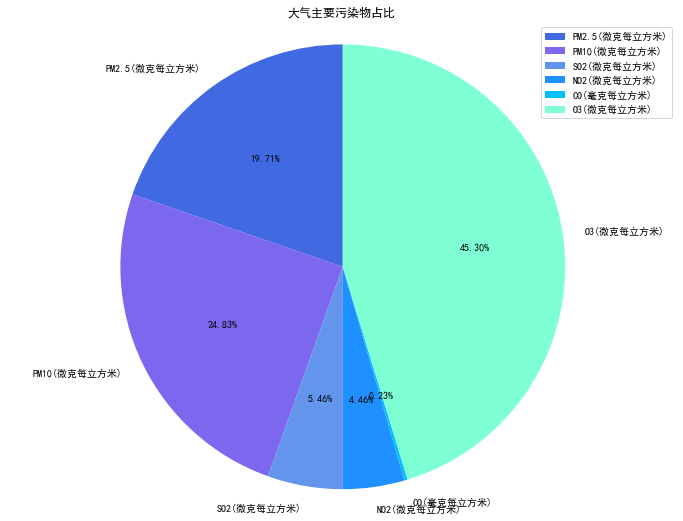

In [55]:
#获取主要污染物的平均值 用它们的总数除以它们的总长度
avger_pm2 = sum(df['PM2.5(微克每立方米)']) / len(df['PM2.5(微克每立方米)'])
avger_pm10 = sum(df['PM10(微克每立方米)']) / len(df['PM10(微克每立方米)'])
avger_s02 = sum(df['SO2(微克每立方米)']) / len(df['SO2(微克每立方米)'])
avger_no2 = sum(df['NO2(微克每立方米)']) / len(df['NO2(微克每立方米)'])
avger_co = sum(df['CO(毫克每立方米)']) / len(df['CO(毫克每立方米)'])
avger_03 = sum(df['O3(微克每立方米)']) / len(df['O3(微克每立方米)'])

x_data = ['PM2.5(微克每立方米)','PM10(微克每立方米)','SO2(微克每立方米)','NO2(微克每立方米)','CO(毫克每立方米)','O3(微克每立方米)']
y_data = [avger_pm2,avger_pm10,avger_s02,avger_no2,avger_co,avger_03]


plt.figure(figsize=(12, 9))  # 调节图形大小
labels = x_data  # 定义标签
sizes = y_data  # 每块值
colors = ['RoyalBlue', 'MediumSlateBlue', 'CornflowerBlue', 'DodgerBlue', 'DeepSkyBlue', 'Aquamarine']  # 每块颜色定义
explode = (0,0,0,0,0,0)  # 将某一块分割出来，值越大分割出的间隙越大
patches, text1, text2 = plt.pie(sizes,
                                explode=explode,
                                labels=labels,
                                colors=colors,
                                labeldistance=1.1,  # 图例距圆心半径倍距离
                                autopct='%3.2f%%',  # 数值保留固定小数位
                                shadow=False,  # 无阴影设置
                                startangle=90,  # 逆时针起始角度设置
                                pctdistance=0.6)  # 数值距圆心半径倍数距离
# patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部文本
# x，y轴刻度设置一致，保证饼图为圆形
plt.axis('equal')
plt.legend()
plt.title('大气主要污染物占比')
plt.savefig('污染物占比图.jpg')
plt.show()

#如图所示，在六项常规污染物中，o3占比是最大的，其次就是PM10了，我们常见的PM2.5占比也只是排到第三而已，所以主要的污染物还是o3

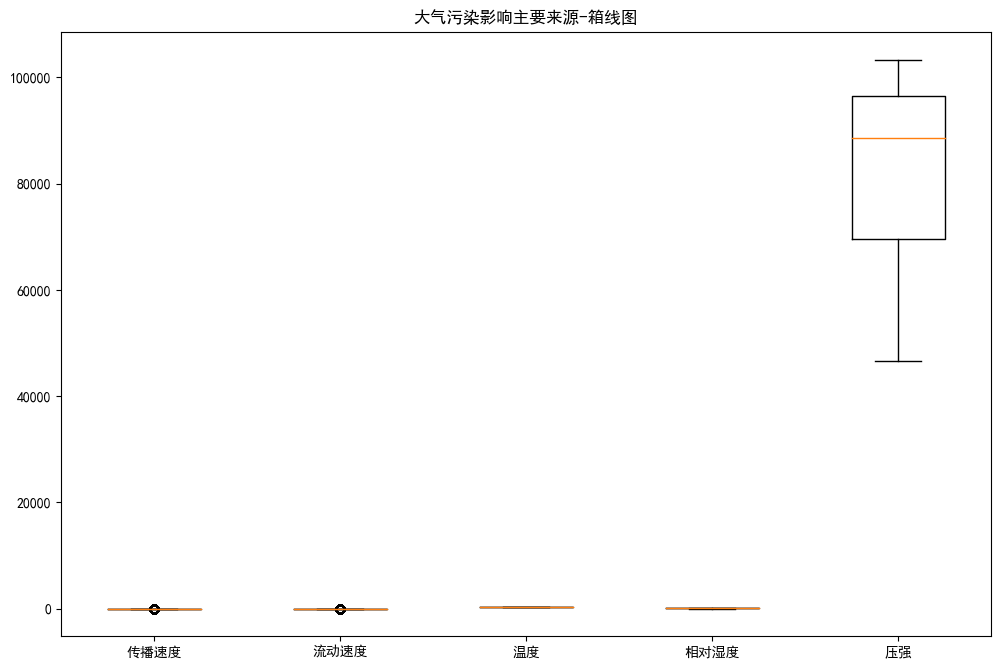

In [56]:
y_data = [df['U(m/s)'],df['V(m/s)'],df['TEMP(K)'],df['RH(%)'],df['PSFC(Pa)']]
x_data = ['传播速度','流动速度','温度','相对湿度','压强']
plt.figure(figsize=(12,8),dpi=100)
plt.title('大气污染影响主要来源-箱线图')
plt.boxplot(y_data, labels=x_data)
plt.savefig('大气污染影响的因素.jpg')
plt.show()
#在风速、温度、气压、相对湿度这些的外界因素的影响下，我们如图所示，用箱线图来说明数据的波动，这里解释一下箱线图：
#首先箱线图中间那条线代表的是数据的中位数，而箱子的上下限，分别是数据的上四分位数和下四分位数，
#因此，箱子的宽度在一定程度上反映了数据的波动程度，箱子越宽说明数据波动也就越大
#而在这些数值中，压强波动是最大的，也是最不稳定的因素，因此我们可以尝试去判断，大气污染上升，是否和压强压强有关呢

In [57]:
#我们选取10天的平均数据来作为我们的参考，证明我们的设想是否正确
df1 = pd.read_csv("./201304/CN-Reanalysis-daily-2013040100.csv").loc[:,['O3(微克每立方米)','PSFC(Pa)']]
avger_03_1= sum(df1['O3(微克每立方米)']) / len(df1['O3(微克每立方米)'])
avger_pa_1 = sum(df1['PSFC(Pa)']) / len(df1['PSFC(Pa)'])

df2 = pd.read_csv("./201304/CN-Reanalysis-daily-2013040200.csv").loc[:,[' O3(微克每立方米)',' PSFC(Pa)']]
avger_03_2= sum(df2[' O3(微克每立方米)']) / len(df2[' O3(微克每立方米)'])
avger_pa_2 = sum(df2[' PSFC(Pa)']) / len(df2[' PSFC(Pa)'])

df3 = pd.read_csv("./201304/CN-Reanalysis-daily-2013040300.csv").loc[:,[' O3(微克每立方米)',' PSFC(Pa)']]
avger_03_3= sum(df3[' O3(微克每立方米)']) / len(df3[' O3(微克每立方米)'])
avger_pa_3 = sum(df3[' PSFC(Pa)']) / len(df3[' PSFC(Pa)'])

df4 = pd.read_csv("./201304/CN-Reanalysis-daily-2013040400.csv").loc[:,[' O3(微克每立方米)',' PSFC(Pa)']]
avger_03_4= sum(df4[' O3(微克每立方米)']) / len(df4[' O3(微克每立方米)'])
avger_pa_4 = sum(df4[' PSFC(Pa)']) / len(df4[' PSFC(Pa)'])

df5 = pd.read_csv("./201304/CN-Reanalysis-daily-2013040500.csv").loc[:,[' O3(微克每立方米)',' PSFC(Pa)']]
avger_03_5= sum(df5[' O3(微克每立方米)']) / len(df5[' O3(微克每立方米)'])
avger_pa_5 = sum(df5[' PSFC(Pa)']) / len(df5[' PSFC(Pa)'])

df6 = pd.read_csv("./201304/CN-Reanalysis-daily-2013040600.csv").loc[:,[' O3(微克每立方米)',' PSFC(Pa)']]
avger_03_6= sum(df6[' O3(微克每立方米)']) / len(df6[' O3(微克每立方米)'])
avger_pa_6 = sum(df6[' PSFC(Pa)']) / len(df6[' PSFC(Pa)'])

df7 = pd.read_csv("./201304/CN-Reanalysis-daily-2013040700.csv").loc[:,[' O3(微克每立方米)',' PSFC(Pa)']]
avger_03_7= sum(df7[' O3(微克每立方米)']) / len(df7[' O3(微克每立方米)'])
avger_pa_7 = sum(df7[' PSFC(Pa)']) / len(df7[' PSFC(Pa)'])

df8 = pd.read_csv("./201304/CN-Reanalysis-daily-2013040800.csv").loc[:,[' O3(微克每立方米)',' PSFC(Pa)']]
avger_03_8= sum(df8[' O3(微克每立方米)']) / len(df8[' O3(微克每立方米)'])
avger_pa_8 = sum(df8[' PSFC(Pa)']) / len(df8[' PSFC(Pa)'])

df9 = pd.read_csv("./201304/CN-Reanalysis-daily-2013040900.csv").loc[:,[' O3(微克每立方米)',' PSFC(Pa)']]
avger_03_9= sum(df9[' O3(微克每立方米)']) / len(df9[' O3(微克每立方米)'])
avger_pa_9 = sum(df9[' PSFC(Pa)']) / len(df9[' PSFC(Pa)'])

df10 = pd.read_csv("./201304/CN-Reanalysis-daily-2013041000.csv").loc[:,[' O3(微克每立方米)',' PSFC(Pa)']]
avger_03_10= sum(df10[' O3(微克每立方米)']) / len(df10[' O3(微克每立方米)'])
avger_pa_10 = sum(df10[' PSFC(Pa)']) / len(df10[' PSFC(Pa)'])

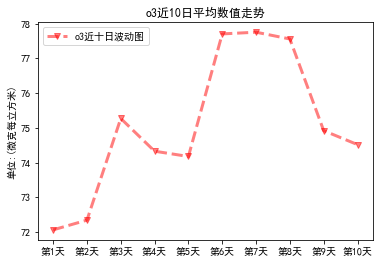

In [58]:
#这里我们用折线图来判断，折线图是最能反映数据的波动状况
x_data = ['第{}天'.format(i) for i in range(1,11)]
y_data1 = [avger_03_1,avger_03_2,avger_03_3,avger_03_4,avger_03_5,avger_03_6,avger_03_7,avger_03_8,avger_03_9,avger_03_10]
y_data2 = [avger_pa_1,avger_pa_2,avger_pa_3,avger_pa_4,avger_pa_5,avger_pa_6,avger_pa_7,avger_pa_8,avger_pa_9,avger_pa_10]
plt.plot(x_data,y_data1,color= 'red',alpha = 0.5,linestyle='--',linewidth=3,marker='v',label='o3近十日波动图')
plt.ylabel('单位:(微克每立方米)')
plt.legend()
plt.title('o3近10日平均数值走势')
plt.savefig('o3近10日平均数值走势.jpg')
plt.show()

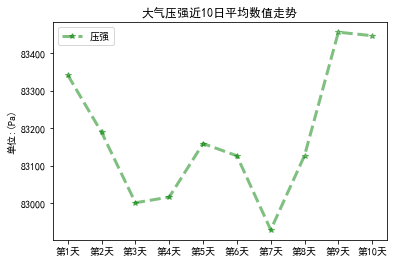

In [59]:
plt.plot(x_data,y_data2,color= 'green',alpha = 0.5,linestyle='--',linewidth=3,marker='*',label='压强')
plt.ylabel('单位:(Pa)')
plt.legend()
plt.title('大气压强近10日平均数值走势')
plt.savefig('大气压强近10日走势.jpg')
plt.show()

通过以上对比，我们可以很明显的看出当大气压强越大的时候，o3的数据反而越
小，而当压强下降的时候，o3反而是呈现上升趋势，也就说明了大气压强和o3正反比例，
因此到了这里总体也符合我们的判断，我们可以大胆的猜测，关键污染成因的和大气压强有关，大气压强越大，那么环境污染的程度越小，大气压强越小反之环境污染就越严重